# Test_0423

In [1]:
type({{}})

TypeError: unhashable type: 'dict'

In [40]:
*a,b,*c='1234'
a,b,c

SyntaxError: two starred expressions in assignment (<ipython-input-40-8499ed6520c8>, line 4)

可以这么说吧？变量要是指向的是不可变对象要，它的值要是变了，地址其实变了

`inline replace`不遵循这个规则...

In [20]:
a = 3
print(id(a))
a = 4
print(id(a))

4515377840
4515377872


In [28]:
list1 = [1,4,3,2,5]
print(list1, id(list1))
list1.sort()
print(list1, id(list1), id(sorted(list1)))
list1.append(6)
print(list1, id(list1))
list1.pop()
print(list1, id(list1))

[1, 4, 3, 2, 5] 140682626950640
[1, 2, 3, 4, 5] 140682626950640 140682626663120
[1, 2, 3, 4, 5, 6] 140682626950640
[1, 2, 3, 4, 5] 140682626950640


In [37]:
data = [1,2,3,4,5,6]
for index, element in enumerate(data):
    print(f'{data}取出索引{index}，元素{element}')
    data.remove(element)
print(data)

[1, 2, 3, 4, 5, 6]取出索引0，元素1
[2, 3, 4, 5, 6]取出索引1，元素3
[2, 4, 5, 6]取出索引2，元素5
[2, 4, 6]


In [35]:
a=b=c=[]
c=[3]
a,b,c

([], [], [3])

# 梯度

解方程$4x^3 - 3x^2 + 2x = 6$

$f(x) = 4x^3 - 3x^2 + 2x$  
$f'(x) = 12x^2 - 6x + 2$   
$\Delta y = f(x) - 6$  
$\Delta x = f'(x)\cdot\Delta y$

In [2]:
def solve_equation(n, lr):
    J   = []
    esp = 1e-8
#     lr  = 0.0001
    x   = 2
    f_x = lambda x : 4 * (x**3) - 3 * (x**2) + 2 * x
    dfx = lambda x : 12 * (x**2) - 6 * x + 2
    dy  = lambda x : f_x(x) - n
    dx  = lambda x : dfx(x) * dy(x) * lr
    while abs(dy(x)) > esp:
        J   += [dy(x)]
        x   -= dx(x)
    return x, J

# x, ctr = solve_equation(6)
# f_x = lambda x : 4 * (x**3) - 3 * (x**2) + 2 * x
f_x = lambda x : (x**2 - 6) ** 2
# print(x, f_x(x), ctr)
# print(solve_equation(6, 0.01))
# print(solve_equation(6, 0.001))
print(solve_equation(6, 0.0001)[0])
print(solve_equation(6, 0.00001)[0])
print(solve_equation(6, 0.000001)[0])
print(solve_equation(6, 0.0000001)[0])

1.2776053723352616
1.2776053723452794
1.2776053723461853
1.2776053723463077


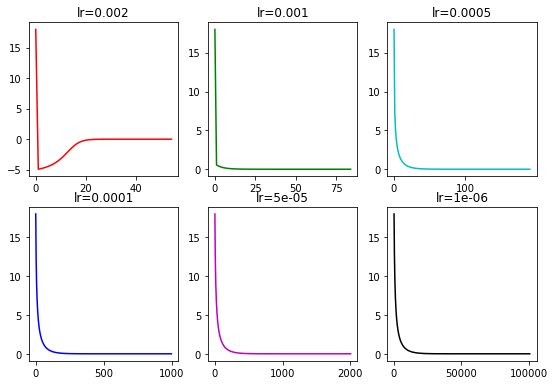

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax  = plt.subplots(nrows=2, ncols=3)
fig.subplots_adjust(hspace=.2,top=1.3, right=1.3)
axs    = ax.flatten()
colors = ['r','g','c','b','m','k']
rates  = [0.002, 0.001, 0.0005, 0.0001, 0.00005,0.000001]
for i in range(len(rates)):
    _, J = solve_equation(6, rates[i])
    x = np.linspace(0, len(J), num=len(J))
    axs[i].plot(x, J, colors[i])
    axs[i].set_title(f'lr={rates[i]}')
#     plt.legend(loc='upper right')

In [301]:
s = []
s.append(1)
s+=[2]
s.extend([3])
s

[1, 2, 3]

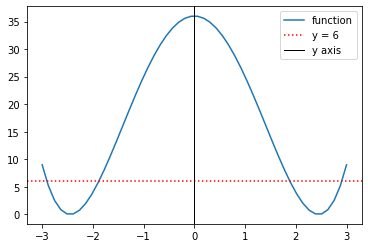

In [289]:
import matplotlib.pyplot as plt

f_x = lambda x : (x**2 - 6) ** 2
x   = np.linspace(-3,3)
y   = f_x(x)
plt.plot(x, y, label='function')

# 设置画板，刻度等
# plt.figure(figsize=(5, 8))
# plt.ylim = [0, 7]

# 画线
# 1
# px  = [-3.5, 3.5]
# py  = [6, 6]
# plt.plot(px, py, 'r--')
# 2
# plt.axline((0, 7), (0, 8)) # 没找到设置颜色的方法
# 3
plt.axhline(y=6, color='r', linestyle=':', label='y = 6')
plt.axvline(x=0, color='black', linewidth=1, label='y axis')
plt.legend(loc='upper right')


In [238]:
def solve_equation(n, x):
    esp = 1e-8
    lr  = 0.001
    f_x = lambda x : (x**2 - 6) ** 2
    dfx = lambda x : 2 * (x**2 - 6) * 2 * x
    dy  = lambda x : f_x(x) - n
    dx  = lambda x : dfx(x) * dy(x) * lr
    ctr = 0
    while abs(dy(x)) > esp:
        x   -= dx(x)
        ctr += 1
    return x, ctr

f_x = lambda x : (x**2 - 6) ** 2
xs  = [-3, -1, 1, 3]
for x in xs:
    r, i = solve_equation(6, x)
    print(f'start: {x},\tx = {r:.9f},\tf(x) = {f_x(r):.4f},\tcount: {i}')

start: -3,	x = -2.906800602,	f(x) = 6.0000,	count: 12
start: -1,	x = -1.884279771,	f(x) = 6.0000,	count: 49
start: 1,	x = 1.884279771,	f(x) = 6.0000,	count: 49
start: 3,	x = 2.906800602,	f(x) = 6.0000,	count: 12


# 切片, 广播

In [82]:
import numpy as np
a = np.arange(24).reshape((2,3,4))
b = np.arange(12).reshape((3,4))
c = np.arange(4).reshape((1,4))
d = np.arange(4).reshape(4)
e = np.arange(12).reshape((1,3,4))
f = np.arange(6).reshape((2,3,1))
g = np.arange(2).reshape((2,1,1))
h = np.arange(2).reshape((1,2,1,1))
i = np.arange(10).reshape((5,2,1,1))

# print((a+b).shape)
# print((a+c).shape)
# print((a+d).shape)
# print((a+e).shape)
# print((a+f).shape)
# print((a+g).shape)
# print((a+h).shape)
# print((a+i).shape)

# 内层元素是1x1的，是高维还是低维，都能相加

print('np.arange(2)\n', np.arange(2))
print('-'*40)
print('np.arange(2).reshape((2,1,1))\n',g)
print('-'*40)
print('np.arange(2).reshape((1,2,1,1))\n',h)
print('-'*40)
print('np.arange(10).reshape((5,2,1,1))\n',i)
print('-'*40)
print('(2,3,4) + (1,2,1,1)\n',a+h)
print('-'*40)
print('(2,3,4) + (5,2,1,1)\n',a+i)

np.arange(2)
 [0 1]
----------------------------------------
np.arange(2).reshape((2,1,1))
 [[[0]]

 [[1]]]
----------------------------------------
np.arange(2).reshape((1,2,1,1))
 [[[[0]]

  [[1]]]]
----------------------------------------
np.arange(10).reshape((5,2,1,1))
 [[[[0]]

  [[1]]]


 [[[2]]

  [[3]]]


 [[[4]]

  [[5]]]


 [[[6]]

  [[7]]]


 [[[8]]

  [[9]]]]
----------------------------------------
(2,3,4) + (1,2,1,1)
 [[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]]

  [[13 14 15 16]
   [17 18 19 20]
   [21 22 23 24]]]]
----------------------------------------
(2,3,4) + (5,2,1,1)
 [[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]]

  [[13 14 15 16]
   [17 18 19 20]
   [21 22 23 24]]]


 [[[ 2  3  4  5]
   [ 6  7  8  9]
   [10 11 12 13]]

  [[15 16 17 18]
   [19 20 21 22]
   [23 24 25 26]]]


 [[[ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]

  [[17 18 19 20]
   [21 22 23 24]
   [25 26 27 28]]]


 [[[ 6  7  8  9]
   [10 11 12 13]
   [14 15 16 17]]

  [[19 20 21 22]


In [74]:
a = np.arange(24).reshape((2,3,4))
print(a)
print('a[:2]\n', a[:2])
print('a[:2][:2, 2, 3]\n', a[:2][:2, 2, 3])

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
a[:2]
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
a[:2][:2, 2, 3]
 [11 23]


In [76]:
print('a[:1,1:,1]\n', a[:1,1:,1])

a[:1,1:,1]
 [[5 9]]


In [79]:
a[:2][1]

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

# 布尔索引

In [80]:
b = np.array([[1,2,3],[4,5,6]])
print(b>1)

[[False  True  True]
 [ True  True  True]]


In [81]:
print(b[b>1])

[2 3 4 5 6]


# 花式索引 (Fancy Indexing)

It is always important to remember with fancy indexing that the return value reflects the `broadcasted shape` of the indices, rather than the shape of the array being indexed.

In [3]:
import numpy as np
c = np.arange(16).reshape((2,2,4))
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [6]:
print(c[[1,0,-1]])  # 取第1，0，-1个元素
print(c[[1,0,-1]].shape)

[[[ 8  9 10 11]
  [12 13 14 15]]

 [[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
(3, 2, 4)


In [217]:
foo = np.arange(10)
foo *= 2
idx = [1,3,5] # 我想取第1，3，5个元素
print(foo)
print(foo[idx])
# 等同于
print(np.array([foo[1], foo[3], foo[5]]))

[ 0  2  4  6  8 10 12 14 16 18]
[ 2  6 10]
[ 2  6 10]


这次取1,3元素，5,7元素分为两组

In [140]:
idx = np.array([[1,3],[5,7]])
print(foo[idx])
print([[foo[1],foo[3]],[foo[5],foo[7]]])

[[ 2  6]
 [10 14]]
[[2, 6], [10, 14]]


In [7]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
row = np.array([0,1,2])
col = np.array([2,1,3])

# 以上组成三组索引[0,2], [1,1], [2, 3]
print(X[row, col])

# 等同于
print(np.array([
    X[0,2],
    X[1,1],
    X[2,3]
]))

[ 2  5 11]
[ 2  5 11]


https://jakevdp.github.io/PythonDataScienceHandbook/02.07-fancy-indexing.html

In [15]:
X[row[:, np.newaxis], col] ### ??? 没看懂

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [250]:
# 因为row[:, np.newaxis] = row[...,None]，即给最里层的维度加1维，行向量变成了列向量
# 广播的维度就成了3 x 3
r'''
(0,2) (0,1) (0,3)
(1,2) (1,1) (1,3)
(2,2) (2,1) (2,3)
'''

array([45, 24,  0])

In [239]:
# [row[:,np.newaxis], col] 一个行向量一个列向量，这种索引是怎么回事呢？
# 其实就是广播了
row[:,np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [244]:
[
    [X[0,2],X[0,1],X[0,3]],
    [X[1,2],X[1,1],X[1,3]],
    [X[2,2],X[2,1],X[2,3]]
]

[[2, 1, 3], [6, 5, 7], [10, 9, 11]]

### fancy indexing 应用

In [17]:
a = [1,3,2,6,5]

# b = np.eye(10)[a,:] 等同于如下写法：

b = []
e = np.eye(10)
for i in range(len(a)):
    b.append(e[a[i]])

    
# c[list(range(len(a))), a] = 1 等同于如下写法：

c = np.zeros((len(a), 10))
for i in range(len(c)):
    c[i, a[i]] = 1

print(c)
b

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])]

In [233]:
d442 = np.zeros((4,4,2))
d242 = np.ones((4,4,1))
d442+d242

array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]])

In [297]:
a = np.arange(16).reshape((4,4))
print(a)
b = np.hstack([a,np.arange(4)[:,np.newaxis]])


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[ 0,  1,  2,  3,  0],
       [ 4,  5,  6,  7,  1],
       [ 8,  9, 10, 11,  2],
       [12, 13, 14, 15,  3]])